In [1]:
import pandas as pd

In [2]:
import numpy as np



In [3]:
df = pd.read_csv("C:/Users/nk098/Desktop/H2HBABBA1752.csv")

In [4]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL associates,2019-09-03 00:00:00,2019.0,1.929749e+09,2019-08-16,20190815,20190816,20190831.0,USD,RV,1.0,NaN,13712.63,20190816.0,NAA8,1.929749e+09,0
1,U001,0200759878,SA corp,2019-02-06 00:00:00,2019.0,1.928645e+09,2019-01-21,20190118,20190121,20190205.0,USD,RV,1.0,NaN,32026.14,20190121.0,NAH4,1.928645e+09,0
2,U001,0200769623,WAL-MAR us,2019-11-12 00:00:00,2019.0,1.930071e+09,2019-10-30,20191029,20191030,20191114.0,USD,RV,1.0,NaN,18398.17,20191030.0,NAH4,1.930071e+09,0
3,U001,0200769623,WAL-MAR,2019-04-11 00:00:00,2019.0,1.929024e+09,2019-03-25,20190325,20190325,20190409.0,USD,RV,1.0,NaN,643.47,20190325.0,NAH4,1.929024e+09,0
4,U001,0200799367,MCL corporation,2019-09-04 00:00:00,2019.0,1.929519e+09,2019-06-21,20190620,20190621,20190904.0,USD,RV,1.0,NaN,4421.76,20190621.0,NAWN,1.929519e+09,0


# PREPROCESSING


In [5]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [6]:
df.shape

(50000, 19)

In [7]:
df.drop("area_business",axis = "columns",inplace=True)

In [8]:
#fix null value of invoice id by mean

In [9]:
mean_value=df['invoice_id'].mean()

In [10]:
df['invoice_id'].fillna(value=mean_value, inplace=True)

In [11]:
df.drop("name_customer",axis = "columns",inplace=True)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
#lets fix datatypes

In [14]:
df.dtypes

business_code              object
cust_number                object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [15]:
df['posting_date'] = pd.to_datetime(df['posting_date'])


In [16]:
df['clear_date'] = pd.to_datetime(df['clear_date'])

df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [17]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

In [18]:
#drop coloumn not useful like doc create date posting id

In [19]:
df.head()


,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,2019-09-03,2019.0,1.929749e+09,2019-08-16,20190815,20190816,2019-08-31,USD,RV,1.0,13712.63,2019-08-16,NAA8,1.929749e+09,0
1,U001,0200759878,2019-02-06,2019.0,1.928645e+09,2019-01-21,20190118,20190121,2019-02-05,USD,RV,1.0,32026.14,2019-01-21,NAH4,1.928645e+09,0
2,U001,0200769623,2019-11-12,2019.0,1.930071e+09,2019-10-30,20191029,20191030,2019-11-14,USD,RV,1.0,18398.17,2019-10-30,NAH4,1.930071e+09,0
3,U001,0200769623,2019-04-11,2019.0,1.929024e+09,2019-03-25,20190325,20190325,2019-04-09,USD,RV,1.0,643.47,2019-03-25,NAH4,1.929024e+09,0
4,U001,0200799367,2019-09-04,2019.0,1.929519e+09,2019-06-21,20190620,20190621,2019-09-04,USD,RV,1.0,4421.76,2019-06-21,NAWN,1.929519e+09,0


# EDA

In [20]:
#LETS CREATE OUR TARGET VARIABLE

In [21]:
df['delay'] = df.clear_date - df.due_in_date

In [22]:
#FIX CUST_PAY_TERM

In [23]:
df['cust_payment_terms'].value_counts()

NAA8    19801
NAH4    13159
CA10     3645
NAC6     1734
NAM4     1303
        ...  
B052        1
NAUN        1
NATW        1
BR12        1
NAUI        1
Name: cust_payment_terms, Length: 75, dtype: int64

In [24]:
df["cust_payment_terms"] = df["cust_payment_terms"].astype('category')#covnert into category datatype

In [25]:
df["cust_payment_terms"] = df["cust_payment_terms"].cat.codes#converted into categorical 


In [26]:
df["cust_payment_terms"].describe()

count    48777.000000
mean        28.520327
std         13.182672
min          0.000000
25%         21.000000
50%         21.000000
75%         38.000000
max         74.000000
Name: cust_payment_terms, dtype: float64

In [27]:
series = pd.value_counts(df.cust_payment_terms)
mask = (series/series.sum() * 100).lt(5)
# To replace df['column'] use np.where I.e 
df['cust_payment_terms'] = np.where(df['cust_payment_terms'].isin(series[mask].index),0,df['cust_payment_terms'])

In [28]:
df["cust_payment_terms"].value_counts()

21    19801
38    13159
0     12172
6      3645
Name: cust_payment_terms, dtype: int64

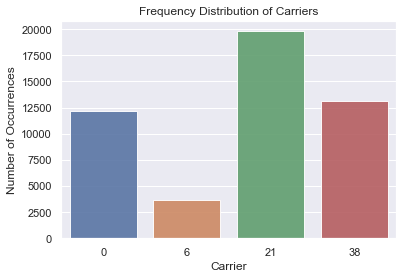

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['cust_payment_terms'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Carrier', fontsize=12)
plt.show()

In [30]:
df["cust_payment_terms"].value_counts()

21    19801
38    13159
0     12172
6      3645
Name: cust_payment_terms, dtype: int64

In [31]:
#LETS FOUND OUTLIERS

In [32]:
# IQR
Q1 = np.percentile(df['total_open_amount'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['total_open_amount'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 

In [33]:
upper = df['total_open_amount'] >= (Q3+1.5*IQR)
  
print("Upper bound:",upper)
print(np.where(upper))
  
# Below Lower bound
lower = df['total_open_amount'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: total_open_amount, Length: 48777, dtype: bool
(array([   27,    77,   100, ..., 48738, 48744, 48768], dtype=int64),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: total_open_amount, Length: 48777, dtype: bool
(array([], dtype=int64),)


In [34]:
# IQR
Q1 = np.percentile(df['invoice_id'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['invoice_id'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 

In [35]:
upper = df['invoice_id'] >= (Q3+1.5*IQR)
  
print("Upper bound:",upper)
print(np.where(upper))
  
# Below Lower bound
lower = df['invoice_id'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998     True
49999    False
Name: invoice_id, Length: 48777, dtype: bool
(array([   28,    31,    38, ..., 48756, 48761, 48775], dtype=int64),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: invoice_id, Length: 48777, dtype: bool
(array([], dtype=int64),)


In [36]:
#FIX INVOICE CURR

In [37]:
df["invoice_currency"].value_counts()

USD    45029
CAD     3748
Name: invoice_currency, dtype: int64

In [38]:

from sklearn.preprocessing import MinMaxScaler

  
# apply normalization techniques
column = 'total_open_amount'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [39]:
df["amount_in_USD"] = np.where(df.invoice_currency=="CAD",df.total_open_amount*0.81,df.total_open_amount)

In [40]:
df.drop("invoice_currency",axis = "columns",inplace=True)

In [41]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD
0,U001,0200799367,2019-09-03,2019.0,1.929749e+09,2019-08-16,20190815,20190816,2019-08-31,RV,1.0,0.020770,2019-08-16,21,1.929749e+09,0,3 days,0.020770
1,U001,0200759878,2019-02-06,2019.0,1.928645e+09,2019-01-21,20190118,20190121,2019-02-05,RV,1.0,0.048509,2019-01-21,38,1.928645e+09,0,1 days,0.048509
2,U001,0200769623,2019-11-12,2019.0,1.930071e+09,2019-10-30,20191029,20191030,2019-11-14,RV,1.0,0.027867,2019-10-30,38,1.930071e+09,0,-2 days,0.027867
3,U001,0200769623,2019-04-11,2019.0,1.929024e+09,2019-03-25,20190325,20190325,2019-04-09,RV,1.0,0.000974,2019-03-25,38,1.929024e+09,0,2 days,0.000974
4,U001,0200799367,2019-09-04,2019.0,1.929519e+09,2019-06-21,20190620,20190621,2019-09-04,RV,1.0,0.006697,2019-06-21,0,1.929519e+09,0,0 days,0.006697


In [42]:
# convert cust_num to int

In [43]:
df['cust_number'] = pd.to_numeric(df['cust_number'], errors='coerce').fillna(0)
df['cust_number'] = df['cust_number'].astype(np.int64)

In [44]:
#conv delay tp int

In [45]:
df["delay"] = df.delay.fillna(0)

C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [46]:
df['delay'] = df['delay'].dt.days.astype('int64')

In [47]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD
0,U001,200799367,2019-09-03,2019.0,1.929749e+09,2019-08-16,20190815,20190816,2019-08-31,RV,1.0,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770
1,U001,200759878,2019-02-06,2019.0,1.928645e+09,2019-01-21,20190118,20190121,2019-02-05,RV,1.0,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509
2,U001,200769623,2019-11-12,2019.0,1.930071e+09,2019-10-30,20191029,20191030,2019-11-14,RV,1.0,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867
3,U001,200769623,2019-04-11,2019.0,1.929024e+09,2019-03-25,20190325,20190325,2019-04-09,RV,1.0,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974
4,U001,200799367,2019-09-04,2019.0,1.929519e+09,2019-06-21,20190620,20190621,2019-09-04,RV,1.0,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697


In [48]:
#check outliers in delay

In [49]:
# IQR
Q1 = np.percentile(df['delay'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['delay'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 


In [50]:
upper = df['delay'] >= (Q3+1.5*IQR)
  
print("Upper bound:",upper)
print(np.where(upper))
  
# Below Lower bound
lower = df['delay'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999     True
Name: delay, Length: 48777, dtype: bool
(array([   29,    31,    35, ..., 48767, 48770, 48776], dtype=int64),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996     True
49997    False
49998    False
49999    False
Name: delay, Length: 48777, dtype: bool
(array([    9,    13,    14, ..., 48763, 48771, 48773], dtype=int64),)


In [51]:
#fix total amount

In [52]:
df["total_open_amount"].describe()

count    48777.000000
mean         0.049177
std          0.059514
min          0.000000
25%          0.007507
50%          0.026749
75%          0.071643
max          1.000000
Name: total_open_amount, dtype: float64

In [53]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 


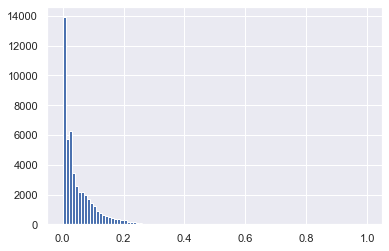

In [54]:
plt.hist(df.total_open_amount,bins= 100)
plt.show()

In [55]:
#normalize data 

In [56]:
#lets fix document type coloumn in line no 38

In [57]:
df["document type"].value_counts()

RV    48775
X2        2
Name: document type, dtype: int64

In [58]:
df.drop("document type",axis = "columns",inplace=True)

In [59]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD
0,U001,200799367,2019-09-03,2019.0,1.929749e+09,2019-08-16,20190815,20190816,2019-08-31,1.0,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770
1,U001,200759878,2019-02-06,2019.0,1.928645e+09,2019-01-21,20190118,20190121,2019-02-05,1.0,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509
2,U001,200769623,2019-11-12,2019.0,1.930071e+09,2019-10-30,20191029,20191030,2019-11-14,1.0,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867
3,U001,200769623,2019-04-11,2019.0,1.929024e+09,2019-03-25,20190325,20190325,2019-04-09,1.0,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974
4,U001,200799367,2019-09-04,2019.0,1.929519e+09,2019-06-21,20190620,20190621,2019-09-04,1.0,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697


In [60]:
df["business_code"].value_counts()

U001    44328
CA02     3748
U013      556
U002      127
U005       14
U007        4
Name: business_code, dtype: int64

In [61]:
#fix buisness code

In [62]:
df["business_code"] = df["business_code"].astype('category')#covnert into category datatype

In [63]:
df["business_code"] = df["business_code"].cat.codes#converted into categorical 


In [64]:
series = pd.value_counts(df.business_code)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['business_code'] = np.where(df['business_code'].isin(series[mask].index),0,df['business_code'])

In [65]:
df["business_code"].value_counts()

1    44328
0     3893
5      556
Name: business_code, dtype: int64

In [66]:
#fix buisness year

In [67]:
df["buisness_year"] = df["buisness_year"].astype('category')#covnert into category datatype

In [68]:
df["buisness_year"] = df["buisness_year"].cat.codes#converted into categorical 


In [69]:
#fix amount in usd

In [70]:
df.total_open_amount

0        0.020770
1        0.048509
2        0.027867
3        0.000974
4        0.006697
           ...   
49995    0.027660
49996    0.053656
49997    0.004969
49998    0.012804
49999    0.002436
Name: total_open_amount, Length: 48777, dtype: float64

In [71]:
df.amount_in_USD

0        0.020770
1        0.048509
2        0.027867
3        0.000974
4        0.006697
           ...   
49995    0.027660
49996    0.053656
49997    0.004969
49998    0.010371
49999    0.002436
Name: amount_in_USD, Length: 48777, dtype: float64

In [72]:
#del useless coloumn

In [73]:
del df["document_create_date"]

In [74]:
del df["posting_id"]

In [75]:
# letas analyze doc create date.1

In [76]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')

In [77]:
df.rename(columns = {'document_create_date.1':'document_create_date'}, inplace = True)

In [78]:
df["diff_posting_create"] = df.posting_date - df.document_create_date

In [79]:
df["diff_posting_create"].value_counts()

0 days     48775
77 days        1
36 days        1
Name: diff_posting_create, dtype: int64

In [80]:
del df["diff_posting_create"]

In [81]:
df["diff_posting_due"] = df.due_in_date - df.posting_date

In [82]:
df["diff_posting_due"].value_counts()

15 days     36864
10 days      1146
20 days      1102
11 days      1003
65 days       948
            ...  
-16 days        1
-18 days        1
106 days        1
52 days         1
-38 days        1
Name: diff_posting_due, Length: 84, dtype: int64

In [83]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD,diff_posting_due
0,1,200799367,2019-09-03,0,1.929749e+09,2019-08-16,2019-08-16,2019-08-31,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770,15 days
1,1,200759878,2019-02-06,0,1.928645e+09,2019-01-21,2019-01-21,2019-02-05,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509,15 days
2,1,200769623,2019-11-12,0,1.930071e+09,2019-10-30,2019-10-30,2019-11-14,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867,15 days
3,1,200769623,2019-04-11,0,1.929024e+09,2019-03-25,2019-03-25,2019-04-09,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974,15 days
4,1,200799367,2019-09-04,0,1.929519e+09,2019-06-21,2019-06-21,2019-09-04,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697,75 days


In [84]:
df['diff_posting_due'] = df['diff_posting_due'].dt.days.astype('int64')

In [85]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD,diff_posting_due
0,1,200799367,2019-09-03,0,1.929749e+09,2019-08-16,2019-08-16,2019-08-31,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770,15
1,1,200759878,2019-02-06,0,1.928645e+09,2019-01-21,2019-01-21,2019-02-05,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509,15
2,1,200769623,2019-11-12,0,1.930071e+09,2019-10-30,2019-10-30,2019-11-14,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867,15
3,1,200769623,2019-04-11,0,1.929024e+09,2019-03-25,2019-03-25,2019-04-09,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974,15
4,1,200799367,2019-09-04,0,1.929519e+09,2019-06-21,2019-06-21,2019-09-04,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697,75


In [86]:
df.cust_payment_terms.describe()

count    48777.000000
mean        19.224901
std         14.201473
min          0.000000
25%          6.000000
50%         21.000000
75%         38.000000
max         38.000000
Name: cust_payment_terms, dtype: float64

In [87]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD,diff_posting_due
0,1,200799367,2019-09-03,0,1.929749e+09,2019-08-16,2019-08-16,2019-08-31,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770,15
1,1,200759878,2019-02-06,0,1.928645e+09,2019-01-21,2019-01-21,2019-02-05,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509,15
2,1,200769623,2019-11-12,0,1.930071e+09,2019-10-30,2019-10-30,2019-11-14,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867,15
3,1,200769623,2019-04-11,0,1.929024e+09,2019-03-25,2019-03-25,2019-04-09,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974,15
4,1,200799367,2019-09-04,0,1.929519e+09,2019-06-21,2019-06-21,2019-09-04,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697,75


In [88]:

df['buisness_year'].value_counts()

0    33832
1    14945
Name: buisness_year, dtype: int64

In [89]:
#DROPPING THE ROWS WHERE THE DOCUMENT FOR INVOICES ARE CREATED BEFORE THE BASELINE CREATE DATE

In [90]:
temp = pd.Series(df['document_create_date'] - df['baseline_create_date']).dt.days

In [91]:
rows_to_drop = temp.value_counts().to_frame(name = 'count')

In [92]:
#no of rows drop satisfyin the cond
rows_to_drop[(rows_to_drop.index <0)].sum()

count    3119
dtype: int64

In [93]:
df = df[((temp==0) | (temp>0))].reset_index(drop=True)

In [94]:
df.shape

(45658, 16)

In [95]:
del df["document_create_date"]

In [96]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amount_in_USD,diff_posting_due
0,1,200799367,2019-09-03,0,1.929749e+09,2019-08-16,2019-08-31,0.020770,2019-08-16,21,1.929749e+09,0,3,0.020770,15
1,1,200759878,2019-02-06,0,1.928645e+09,2019-01-21,2019-02-05,0.048509,2019-01-21,38,1.928645e+09,0,1,0.048509,15
2,1,200769623,2019-11-12,0,1.930071e+09,2019-10-30,2019-11-14,0.027867,2019-10-30,38,1.930071e+09,0,-2,0.027867,15
3,1,200769623,2019-04-11,0,1.929024e+09,2019-03-25,2019-04-09,0.000974,2019-03-25,38,1.929024e+09,0,2,0.000974,15
4,1,200799367,2019-09-04,0,1.929519e+09,2019-06-21,2019-09-04,0.006697,2019-06-21,0,1.929519e+09,0,0,0.006697,75


In [97]:
# lets analyze invoice id and doc id

In [98]:
df["test_diff"] = df.doc_id- df.invoice_id


In [99]:
df["test_diff"].value_counts()

0.000000e+00    45656
7.490185e+09        1
7.490185e+09        1
Name: test_diff, dtype: int64

In [100]:
df["doc_id"].shape

(45658,)

In [101]:
del df["doc_id"]

In [102]:
del df["invoice_id"]

# Splitting of Data

In [103]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [104]:
df.sort_values(by='posting_date',inplace = True)

In [105]:
df1 = df[df['isOpen'] == 0]

In [106]:
df1.shape

(36543, 14)

In [107]:
df2 = df[df['isOpen'] == 1]

In [108]:
df2.shape

(9115, 14)

In [109]:
#convert DATE coloumn to year month day.

In [110]:
df1['posting_date.day'] = df1['posting_date'].dt.day
df1['posting_date.month'] = df1['posting_date'].dt.month
df1['posting_date.year'] = df1['posting_date'].dt.year


C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [111]:
df1['baseline_create_date.day'] = df1['baseline_create_date'].dt.day
df1['baseline_create_date.month'] = df1['baseline_create_date'].dt.month
df1['baseline_create_date'] = df1['baseline_create_date'].dt.year


C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [112]:
df1['due_in_date.day'] = df1['due_in_date'].dt.day
df1['due_in_date.month'] = df1['due_in_date'].dt.month
df1['due_in_date.year'] = df1['due_in_date'].dt.year


C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nk098\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [113]:
del df1["baseline_create_date"]

In [114]:
del df1["due_in_date"]

In [115]:
del df1["posting_date"]

# Feature engg

In [116]:
import seaborn as sb
import matplotlib.pyplot as mp

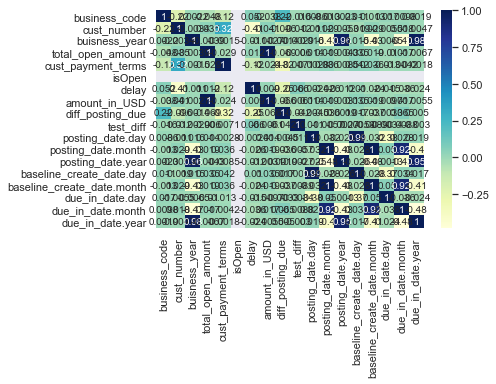

In [117]:
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [118]:
#cust no , cust payment terms
#buisness code , diff posting due
# delay , buisness code 
# shows good relation ship

In [119]:
df1.head()

,business_code,cust_number,clear_date,buisness_year,total_open_amount,cust_payment_terms,isOpen,delay,amount_in_USD,diff_posting_due,test_diff,posting_date.day,posting_date.month,posting_date.year,baseline_create_date.day,baseline_create_date.month,due_in_date.day,due_in_date.month,due_in_date.year
36760,1,200769623,2019-01-16,0,0.059470,38,0,2,0.059470,15,0.0,30,12,2018,30,12,14,1,2019
19421,1,200771157,2019-01-18,0,0.118894,21,0,4,0.118894,15,0.0,30,12,2018,30,12,14,1,2019
42702,1,200769623,2019-01-09,0,0.003298,38,0,-5,0.003298,15,0.0,30,12,2018,30,12,14,1,2019
21884,1,200769623,2019-01-10,0,0.041971,38,0,-4,0.041971,15,0.0,30,12,2018,30,12,14,1,2019
27827,1,200769623,2019-01-10,0,0.004689,38,0,-4,0.004689,15,0.0,30,12,2018,30,12,14,1,2019


In [120]:
df1.dtypes

business_code                           int8
cust_number                            int64
clear_date                    datetime64[ns]
buisness_year                           int8
total_open_amount                    float64
cust_payment_terms                      int8
isOpen                                 int64
delay                                  int64
amount_in_USD                        float64
diff_posting_due                       int64
test_diff                            float64
posting_date.day                       int64
posting_date.month                     int64
posting_date.year                      int64
baseline_create_date.day               int64
baseline_create_date.month             int64
due_in_date.day                        int64
due_in_date.month                      int64
due_in_date.year                       int64
dtype: object

In [121]:
del df1["clear_date"]

In [122]:
del df1["diff_posting_due"]

In [123]:
del df1["test_diff"]

# train model then loop to feat engg

In [124]:
#lets split data into train and test set

In [125]:
x=df1.drop('delay',axis=1)

In [126]:
y = df1["delay"]

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1,shuffle = False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,shuffle = False)


In [129]:
X_train.head()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,isOpen,amount_in_USD,posting_date.day,posting_date.month,posting_date.year,baseline_create_date.day,baseline_create_date.month,due_in_date.day,due_in_date.month,due_in_date.year
36760,1,200769623,0,0.059470,38,0,0.059470,30,12,2018,30,12,14,1,2019
19421,1,200771157,0,0.118894,21,0,0.118894,30,12,2018,30,12,14,1,2019
42702,1,200769623,0,0.003298,38,0,0.003298,30,12,2018,30,12,14,1,2019
21884,1,200769623,0,0.041971,38,0,0.041971,30,12,2018,30,12,14,1,2019
27827,1,200769623,0,0.004689,38,0,0.004689,30,12,2018,30,12,14,1,2019


# lets create a base model

In [130]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_predict = base_model.predict(X_val)

In [133]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict)

44.1547353954723

# check for over or under fitting

In [135]:
y_predict_test = base_model.predict(X_test)
mean_squared_error(y_test, y_predict_test)

1073.5360499968665

# model is overfitting 44 on val set and 1073 on test set again loop to feature engg